In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [2]:
f = open('obesity-cleaned.csv')
workingdataLIST = [] #we create two empty lists, one for storing all the data from the dataset and other for storing the ten rows that we will work with

for line in f.readlines(): #we read the file in the aux list and we put the header in a separate list
    val = line.split(",")
    workingdataLIST.append(val)
listheader = workingdataLIST[0].copy()
listheader[-1] = listheader[-1].rstrip()
del workingdataLIST[0]

#workingdata = pd.read_csv("obesity-cleaned.csv")


sub_str = " "
NoDataList = []
count = 0 
for i in workingdataLIST:  #we eliminate all the elements that have no data about obesity, it happens in some countries,
    #so first we count all the indexes in which that happens
    if i[3] == 'No data':
        NoDataList.append(count)
    else:
        new_str = i[3]
        replace = new_str[:new_str.index(sub_str) + len(sub_str)] #we delete the characters that make it impossible for us to 
        #convert the obesity value which is a string to a float
        i[3] = float(replace)
        i[2] = float(i[2])
    count += 1

for i in range(len(NoDataList)):
    del workingdataLIST[NoDataList[i]-i] #we use the previously created list to delete all the elements from those indexes
    
for i in workingdataLIST:  
    del i[0]
for i in workingdataLIST:  
    i[-1]=i[-1].rstrip("\n") #we eliminate the endline character
    
CurrentCountry = 1
CountryIndexes = {}
for i in workingdataLIST:  #we create another attribute for our dataframe that numerates the countries
    if i[0] in CountryIndexes:
        i.append(CurrentCountry)
    else:
        CountryIndexes[i[0]] = CurrentCountry
        i.append(CurrentCountry)
        CurrentCountry += 1    

print(CountryIndexes)
WorkingDf = pd.DataFrame(workingdataLIST, columns = ['Country', 'Year', 'Obesity_(%)', 'Sex', 'Country_ID'])
WorkingDf.to_csv(r'export_dataframe.csv',index=False, header=True)
 

{'Afghanistan': 1, 'Albania': 2, 'Algeria': 3, 'Andorra': 4, 'Angola': 5, 'Antigua and Barbuda': 6, 'Argentina': 7, 'Armenia': 8, 'Australia': 9, 'Austria': 10, 'Azerbaijan': 11, 'Bahamas': 12, 'Bahrain': 13, 'Bangladesh': 14, 'Barbados': 15, 'Belarus': 16, 'Belgium': 17, 'Belize': 18, 'Benin': 19, 'Bhutan': 20, 'Bolivia (Plurinational State of)': 21, 'Bosnia and Herzegovina': 22, 'Botswana': 23, 'Brazil': 24, 'Brunei Darussalam': 25, 'Bulgaria': 26, 'Burkina Faso': 27, 'Burundi': 28, 'Cabo Verde': 29, 'Cambodia': 30, 'Cameroon': 31, 'Canada': 32, 'Central African Republic': 33, 'Chad': 34, 'Chile': 35, 'China': 36, 'Colombia': 37, 'Comoros': 38, 'Congo': 39, 'Cook Islands': 40, 'Costa Rica': 41, 'Croatia': 42, 'Cuba': 43, 'Cyprus': 44, 'Czechia': 45, "CÃ´te d'Ivoire": 46, "Democratic People's Republic of Korea": 47, 'Democratic Republic of the Congo': 48, 'Denmark': 49, 'Djibouti': 50, 'Dominica': 51, 'Dominican Republic': 52, 'Ecuador': 53, 'Egypt': 54, 'El Salvador': 55, 'Equatorial

In [3]:

class dataset:  #we declare the parent class which will receive a filename as an argument
    def __init__(self, filename): #with this init we will not only initialize the dataset, but will get an overview of it and some calculations
        self.f = open(filename)
        self.workingdata = [] #we create two empty lists, one for storing all the data from the dataset and other for storing the ten rows that we will work with
        #self.aux = []
        for line in self.f.readlines(): #we read the file in the aux list and we put the header in a separate list
            self.val = line.split(",")
            #self.aux.append(self.val)
            self.workingdata.append(self.val)
        self.listheader = self.workingdata[0].copy()
        self.listheader[-1] = self.listheader[-1].rstrip()
        del self.workingdata[0]
        #del self.aux[0]
        
        for i in range(len(self.workingdata)):
            for j in range(len(self.listheader)):
                if self.make_number(self.workingdata[i][j]) is not False:
                    self.workingdata[i][j] = self.make_number(self.workingdata[i][j])
        
        print("printing the dataset headers of: ",filename, "\n\n", self.listheader)
        #for i in range(0,10): #here we put ten random rows in the working data 
            #self.workingdata.append(self.aux[random.randint(0,len(self.aux))])
            #print(self.workingdata[i])


    def make_number(self, s): #helper method to check if an element of the list is a numeric value
        try:
            s = float(s)
            return s
        except ValueError:
            return False

    def mean(self, column): #helper function to calculate mean
        self.index = self.listheader.index(column)
        if isinstance(self.workingdata[0][self.index], float):
            self.auxarray = []
            for i in range(len(self.workingdata)):
                self.auxarray.append(self.workingdata[i][self.index])
            return np.mean(self.auxarray)
            self.auxarray.clear()
        else:
            print("not a numeric value")

    def std(self, column): #helper function to calculate standard deviation
        self.index = self.listheader.index(column)
        if isinstance(self.workingdata[0][self.index], float):
            self.auxarray = []
            for i in range(len(self.workingdata)):
                self.auxarray.append(self.workingdata[i][self.index])
            return np.std(self.auxarray)
            self.auxarray.clear()
        else:
            print("not a numeric value")

    def var(self, column): #helper function to calculate variation
        self.index = self.listheader.index(column)
        if isinstance(self.workingdata[0][self.index], float):
            self.auxarray = []
            for i in range(len(self.workingdata)):
                self.auxarray.append(self.workingdata[i][self.index])
            return np.var(self.auxarray)
            self.auxarray.clear()
        else:
            print("not a numeric value")
    def max(self, column): #helper function to calculate max value
        self.index = self.listheader.index(column)
        if isinstance(self.workingdata[0][self.index], float):
            self.auxarray = []
            for i in range(len(self.workingdata)):
                self.auxarray.append(self.workingdata[i][self.index])
            return np.max(self.auxarray)
            self.auxarray.clear()
        else:
            print("not a numeric value")

    def min(self, column): #helper function to calculate min value
        self.index = self.listheader.index(column)
        if isinstance(self.workingdata[0][self.index], float):
            self.auxarray = []
            for i in range(len(self.workingdata)):
                self.auxarray.append(self.workingdata[i][self.index])
            return np.min(self.auxarray)
            self.auxarray.clear()
        else:
            print("not a numeric value")



FinalWorkingData = pd.read_csv("export_dataframe.csv")
#corr_matrix = FinalWorkingData.corr()
print(FinalWorkingData)
#print(corr_matrix)



#We can see that there is a strong relation between the variables "Year" and "Obesity (%)", meaning that we are on the 
#good path with our hypothesis because this implies that the latest the year, the biggest the obesity is 



           Country    Year  Obesity_(%)         Sex  Country_ID
0      Afghanistan  1975.0          0.5  Both sexes           1
1      Afghanistan  1975.0          0.2        Male           2
2      Afghanistan  1975.0          0.8      Female           2
3      Afghanistan  1976.0          0.5  Both sexes           2
4      Afghanistan  1976.0          0.2        Male           2
...            ...     ...          ...         ...         ...
24061     Zimbabwe  2015.0          4.5        Male         192
24062     Zimbabwe  2015.0         24.8      Female         192
24063     Zimbabwe  2016.0         15.5  Both sexes         192
24064     Zimbabwe  2016.0          4.7        Male         192
24065     Zimbabwe  2016.0         25.3      Female         192

[24066 rows x 5 columns]


In [4]:
#We declare the multilinear regression here
ObesityDataClass = dataset("export_dataframe.csv")
ObesityDataClass.mean("Year")

X = FinalWorkingData[['Country_ID', 'Year']]
y = FinalWorkingData['Obesity_(%)']
#we relate the y values with the x values 
regr = linear_model.LinearRegression()
regr.fit(X, y)

predictedObesity = regr.predict([[27, 2040]])
print(predictedObesity)

printing the dataset headers of:  export_dataframe.csv 

 ['Country', 'Year', 'Obesity_(%)', 'Sex', 'Country_ID']
[26.14628471]


C:\Users\sexysehe\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [5]:
#since the multilinear didn't really work well, we create a function for just the linear regression that takes the countryname
#and creates another array for the obesity values of just that country 
def LinRegCountry (countryname, year):
    ValuesObesity = []
    ValuesYear = []
    for i in range(len(FinalWorkingData)):
        if FinalWorkingData['Country'][i] == countryname:
            ValuesObesity.append(FinalWorkingData['Obesity_(%)'][i])
            #here we append the obesity values
            ValuesYear.append(FinalWorkingData['Year'][i])
    np_arrayYears=np.asarray(ValuesYear)
    #we convert the years values to numpy array since it has to be reshaped later to work with
    #the linear regression
    regr.fit(np_arrayYears.reshape(-1,1), ValuesObesity)
    np_year = np.asarray(year)
    predictedObesity = regr.predict(np_year.reshape(1,-1))
    #print(predictedObesity)
    return predictedObesity



In [69]:
def PolRegCountry (countryname, year):
    #pretty much the same as linear regression in terms of processing the data, so won't comment
    #on that
    ValuesObesity = []
    ValuesYear = []
    for i in range(len(FinalWorkingData)):
        if FinalWorkingData['Country'][i] == countryname:
            ValuesObesity.append(FinalWorkingData['Obesity_(%)'][i])
            ValuesYear.append(FinalWorkingData['Year'][i])
    np_arrayYears = np.array(ValuesYear)
    np_Obesity = np.array(ValuesObesity)
    poly = PolynomialFeatures(degree=3, include_bias=False)#here we declare the polynomial regression
    #features, we set the degree to 3 as it seems to fit well

    #reshape data to work properly with sklearn
    x_poly = poly.fit_transform(np_arrayYears.reshape(-1,1))

    #fit polynomial regression model
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(x_poly, np_Obesity)

    #use model to make predictions on response variable
    np_year = poly.fit_transform(np.array(year).reshape(1,-1))
    y_predicted = poly_reg_model.predict(np_year)

    #create scatterplot of x vs. y
    #plt.scatter(x, y)

    #add line to show fitted polynomial regression model
    #plt.plot(x, y_predicted, color='purple')
    return y_predicted

def PlotPrediction (countryname, polynomial = False): #this will plot a prediction graph for the obesity levels of a certain country
    Plot_Values_Obesity = []
    Plot_Values_Year = []
    for i in range (1975, 2050):
        Plot_Values_Year.append(i)
        if polynomial == True: #we can select whether we want to use polynomial or linear regression 
            #with this argument
            Plot_Values_Obesity.append(PolRegCountry(countryname, i))
        else:    
            Plot_Values_Obesity.append(LinRegCountry(countryname, i))
    plt.plot(Plot_Values_Year,Plot_Values_Obesity)

[44.83076544]


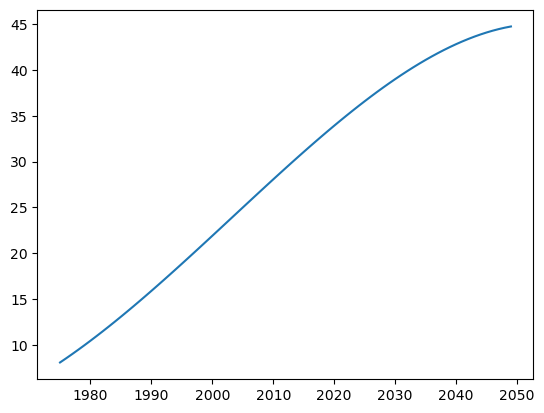

In [68]:
prediction = PolRegCountry('Turkey', 2050)
PlotPrediction('Turkey', True)

print(prediction)

In [181]:
def LinRegCountryGender (countryname, year, gender):
    #Since we were using all the obesity values for a certain country we realized that we were using them
    #all regarless of the gender, and we were putting together males females and both genders which in essence
    #is already an average of male and female, so it was not really working accurately when we plotted it against
    #the real data, thus we decided to add a gender selection
    ValuesObesity = []
    ValuesYear = []
    for i in range(len(FinalWorkingData)):
        #the gender selection is added just changing the following if statement a little bit, 
        #you can observe the and "FinalWorkingData['Sex'][i] == gender:"
        if FinalWorkingData['Country'][i] == countryname and FinalWorkingData['Sex'][i] == gender:
            ValuesObesity.append(FinalWorkingData['Obesity_(%)'][i])
            ValuesYear.append(FinalWorkingData['Year'][i])
    np_arrayYears=np.asarray(ValuesYear)

    regr.fit(np_arrayYears.reshape(-1,1), ValuesObesity)
    np_year = np.asarray(year)
    predictedObesity = regr.predict(np_year.reshape(1,-1))
    #print(predictedObesity)
    return predictedObesity


In [189]:
def PolRegCountryGender (countryname, year, gender, ploterror = True, Manual = False):
    #in order to make better the polynomial regression we not only add the gender selection but 
    #we add a hyperparameter optimization algorithm, in which we check the mean squared error of the 
    #polynomial regression and we keep the polynomial degree that returns the minimum error
    
    #in any case we also add a manual selector for the polynomial degree just in case we want to try 
    #with other degrees polynomials
    ValuesObesity = []
    ValuesYear = []
    for i in range(len(FinalWorkingData)):
        if FinalWorkingData['Country'][i] == countryname and FinalWorkingData['Sex'][i] == gender:
            ValuesObesity.append(FinalWorkingData['Obesity_(%)'][i])
            ValuesYear.append(FinalWorkingData['Year'][i])
    np_arrayYears = np.array(ValuesYear)
    np_Obesity = np.array(ValuesObesity)

    #fit polynomial regression model
    poly_reg_model = LinearRegression()

    
    #we implement a degree selector which is going to give us the most accurate
    #degree for our polynomial regression
    
    minmse=9999999
    error=[]
    for i in range (1, 15):
        poly_features = PolynomialFeatures(degree=i, include_bias=False) #We iterate the features of the polynomial for each degree that we want to test
        X_poly = poly_features.fit_transform(np_arrayYears.reshape(-1,1)) #We fit the x data so it's suitable for the polynomial fitting
        poly_reg_model.fit(X_poly, np_Obesity)
        mse = 0
        for j in range(1975, 2017):
            mse = (mse + (np_Obesity[j-1975] - (#We calculate the mean squared error for each polynomial degree
                poly_reg_model.predict(poly_features.fit_transform(np.array([j]).reshape(1, -1)))))**2)
        mse = mse /41
        error.append(mse)#We append that calculated error to an error array so we can sitck with the minimum of the array

        if mse < minmse:
            minmse = mse
            optimaldegree = i 
    
    #in case we want to plot the error, we can use ploterror = True which is the default value
    if ploterror == True:       
        plt.plot(list(range(1,15)),error)
        plt.xlabel('Degree of the polynomial')
        plt.ylabel('Average mean squared error')
        plt.show()
    
    #here we set the degree of the polynomial based on whether we decided a manual degree or not
    if Manual  == False:
        degree = optimaldegree
        if ploterror == True:  
            print("\nthe optimal degree of the polynomial regression is:", optimaldegree)
    else:
        degree = Manual
        if ploterror == True:  
            print("\nthe degree of the polynomial regression is the manually selected:", Manual)

    poly = PolynomialFeatures(degree, include_bias=False)
    #reshape data to work properly with sklearn
    x_poly = poly.fit_transform(np_arrayYears.reshape(-1,1))
    poly_reg_model.fit(x_poly, np_Obesity)
    if ploterror == True:
        print("\nEstimated model parameters for polynomial regression", poly_reg_model.intercept_, poly_reg_model.coef_)

    #use model to make predictions on response variable
    np_year = poly.fit_transform(np.array(year).reshape(1,-1))
    y_predicted = poly_reg_model.predict(np_year)

    #create scatterplot of x vs. y
    #plt.scatter(x, y)

    #add line to show fitted polynomial regression model
    #plt.plot(x, y_predicted, color='purple')
    return y_predicted, np_Obesity

def PlotPredictionGender (countryname, gender, polynomial = False, Manual = False): #this will plot a prediction graph for the obesity levels of a certain country
    Plot_Values_Obesity = []
    Plot_Values_Year = []
    for i in range (1975, 2051):
        Plot_Values_Year.append(i)
        if polynomial == True:
            if i == 1975:
                Plot_Values_Obesity.append(PolRegCountryGender(countryname, i, gender, Manual = Manual)[0])
            else:
                Plot_Values_Obesity.append(PolRegCountryGender(countryname, i, gender, ploterror = False, Manual = Manual)[0])
        else:
            Plot_Values_Obesity.append(LinRegCountryGender(countryname, i, gender))
    ydata = PolRegCountryGender(countryname, i, gender, ploterror = False, Manual = Manual)[1] #we call the polynomial regression
    #once just to get the real data, we could also do it with the linear regression but we decided to use the polynomial since 
    #it returns the data with a numpy array rather than a list, and we are more comfortable with numpy
    
    
    
    #this last lines of the code are for plotting not only the calculated values but also the 
    #real values that the regression comes from
    previouslength = len(ydata)
    for i in range(len(Plot_Values_Year)-previouslength): 
        ydata = np.append(ydata, None)
    
    plt.plot(Plot_Values_Year, ydata, "b.", label = 'Original data')
    plt.plot(Plot_Values_Year,Plot_Values_Obesity, "r-", label = 'Fitted line')
    plt.grid()
    plt.legend() 
    plt.xlabel("Year") 
    plt.ylabel("Obesity")
    plt.show

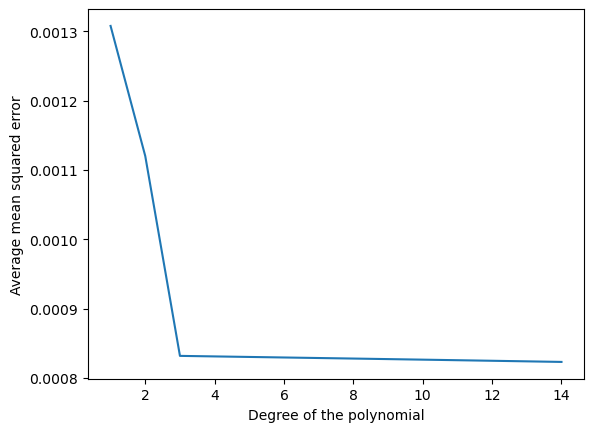


the optimal degree of the polynomial regression is: 14

Estimated model parameters for polynomial regression -408.7012706562598 [ 2.40319500e-71  8.66024335e-43 -2.52797680e-47  5.70957491e-70
  8.79524327e-58  1.63792996e-54  2.86007664e-51  4.65930557e-48
  6.97376622e-45  9.27825625e-42  1.01841451e-38  7.39081979e-36
 -6.74345369e-39  1.55008278e-42]
The previously calculated predictin with polynomial regression is:  [23.7687365]


The previously calculated predictin with linear regression is:  23.756035437430796


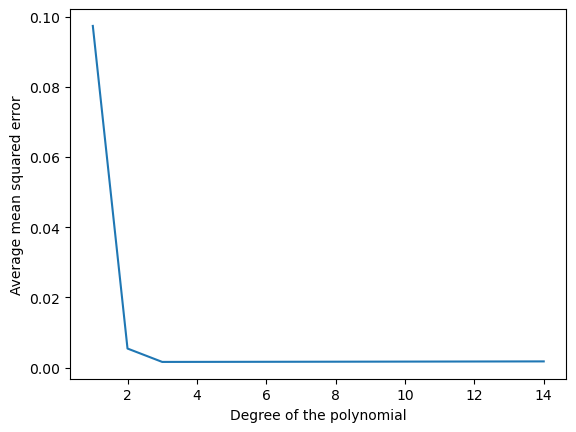


the optimal degree of the polynomial regression is: 3

Estimated model parameters for polynomial regression 355966.84935257025 [-5.31264024e+02  2.64121218e-01 -4.37384300e-05]


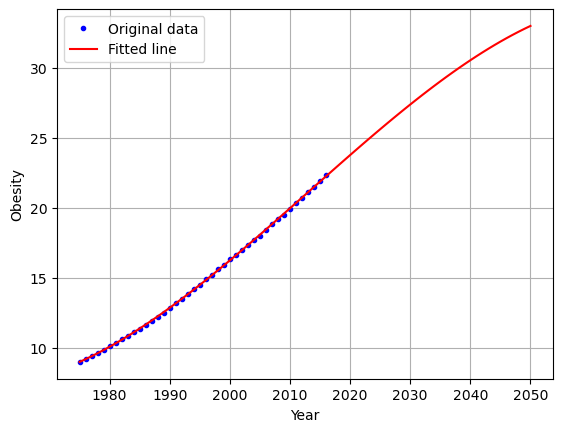

In [191]:
prediction1 = PolRegCountryGender('Spain', 2016, 'Both sexes')[0]
print("The previously calculated predictin with polynomial regression is: ",prediction1)


prediction2 = LinRegCountryGender('Spain', 2016, 'Both sexes')[0]
print("\n\nThe previously calculated predictin with linear regression is: ",prediction2)


PlotPredictionGender('Germany',  'Both sexes', polynomial = True)

"""
Germany for both sexes and polynomial works nicely

turkey for females adapts very well to the curve but due to the negative coefficient in the cubic one it goes down quite fast after 2045,
maybe in that case it's better to keep the predictions until like only 2035"""
